In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jlinops import CGApproximatePseudoinverse, MatrixOperator
from scipy.linalg import null_space

In [2]:
m, n = 8, 5
Amat = np.random.normal(size=(m,n))
Amat[:,-1] = Amat[:,-2]
A = MatrixOperator(Amat)
W = null_space(Amat)

In [3]:
W

array([[-0.00000000e+00],
       [ 3.78009215e-17],
       [ 6.68175082e-18],
       [ 7.07106781e-01],
       [-7.07106781e-01]])

In [4]:
A.matvec(np.ones(5))

array([ 0.62783335,  0.56387124,  4.43606439, -3.81431161, -1.52647492,
       -3.29220331,  0.86927562,  3.15949813])

In [5]:
A.shape

(8, 5)

In [6]:
Apinv = CGApproximatePseudoinverse(A)

/Users/jonathanlindbloom/Github/jlinops/src/jlinops/linear_solvers.py:39: RuntimeWarning: invalid value encountered in double_scalars
  rel_residual_norm = residual_norm/bnorm
/Users/jonathanlindbloom/Github/jlinops/src/jlinops/linear_solvers.py:44: RuntimeWarning: invalid value encountered in double_scalars
  alpha = (r.T @ r)/(d.T @ A.matvec(d) )


In [7]:
Apinv @ np.ones(8)

array([-0.45450923, -0.64135153,  0.62660438,  0.20691699,  0.20691699])

In [8]:
np.linalg.pinv(Amat) @ np.ones(8)

array([-0.45450923, -0.64135153,  0.62660438,  0.20691699,  0.20691699])

In [9]:
Apinv.shape

(5, 8)

In [10]:
Apinv.T.shape

(8, 5)

In [11]:
Apinv.prev_eval.shape

(5,)

In [12]:
Apinv.prev_eval_t.shape

(5,)

In [13]:
Apinv.rmatvec( np.ones(5) )

array([-0.29127033,  0.01642752,  0.66250401, -0.21705657, -0.41410413,
       -0.06000017,  0.09024346,  0.1578338 ])

In [14]:
np.linalg.pinv(Amat).T @ np.ones(5)

array([-0.29127033,  0.01642752,  0.66250401, -0.21705657, -0.41410413,
       -0.06000017,  0.09024346,  0.1578338 ])

In [35]:
z = np.random.normal(size=8)
np.linalg.norm( Apinv.matvec( z ) - np.linalg.pinv(Amat) @ z )

6.515543783841503e-16

In [34]:
z = np.random.normal(size=5)
zmod = z - (1.0/(W[:,0].dot(W[:,0])))*(W[:,0].dot(z))*W[:,0]
np.linalg.norm( Apinv.rmatvec( zmod ) - np.linalg.pinv(Amat).T @ zmod )

5.28085841456928e-16

In [30]:
np.linalg.pinv(Amat).T @ np.ones(5)

array([ 0.55840508,  0.44673225,  0.2207046 , -0.51774679, -1.19024621,
       -0.09294918, -0.18788914,  0.73149426])

# Experiment with large random matrix?

In [19]:
m, n = 100, 63

errors = []
terrors = []
n_trials = 1000

for j in range(n_trials):   

    Amat = np.random.normal(size=(m,n))
    A = MatrixOperator(Amat)
    Apinv = CGApproximatePseudoinverse(A)
    x1 = np.random.normal(size=(m,))
    x2 = np.random.normal(size=(n,))
    
    matvec = Apinv @ x1
    error = np.linalg.norm(matvec - (np.linalg.pinv(Amat) @ x1 ))
    errors.append(error)

    rmatvec = Apinv.T @ x2
    terror = np.linalg.norm(rmatvec - (np.linalg.pinv(Amat).T @ x2 ))
    terrors.append(terror)

/Users/jonathanlindbloom/Github/jlinops/src/jlinops/linear_solvers.py:39: RuntimeWarning: invalid value encountered in double_scalars
  rel_residual_norm = residual_norm/bnorm
/Users/jonathanlindbloom/Github/jlinops/src/jlinops/linear_solvers.py:44: RuntimeWarning: invalid value encountered in double_scalars
  alpha = (r.T @ r)/(d.T @ A.matvec(d) )


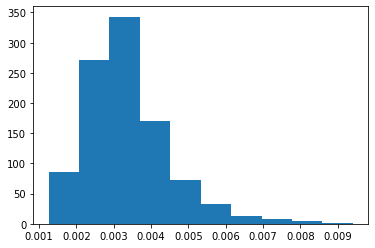

In [20]:
plt.hist(errors)
plt.show()

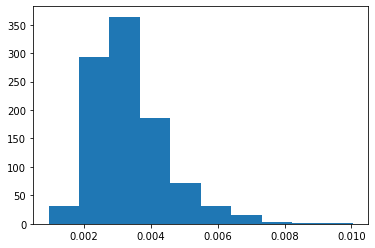

In [21]:
plt.hist(terrors)
plt.show()